# 2. 获得文本语料和词汇资源

在自然语言处理的实际项目中，通常要使用大量的语言数据或者语料库。本章的目的是要回答下列问题：

1. 什么是有用的文本语料和词汇资源，我们如何使用Python 获取它们？
2. 哪些Python 结构最适合这项工作？
3. 编写Python 代码时我们如何避免重复的工作？

本章继续通过语言处理任务的例子展示编程概念。在系统的探索每一个Python 结构之前请耐心等待。如果你看到一个例子中含有一些不熟悉的东西，请不要担心。只需去尝试它，看看它做些什么——如果你很勇敢——通过使用不同的文本或词替换代码的某些部分来进行修改。这样，你会将任务与编程习惯用法关联起来，并在后续的学习中了解怎么会这样和为什么是这样。

<a href="#1">1 获取文本语料库</a>

<a href="#2">2 条件频率分布</a>

<a href="#3.2">3.2 函数</a>

<a href="#4">4 词汇资源</a>

<a href="#5">5 WordNet</a>

<a href="#6">6 小结</a>


<span id="1"></span>

## 1 获取文本语料库



正如刚才提到的，一个文本语料库是一大段文本。许多语料库的设计都要考虑一个或多个文体间谨慎的平衡。我们曾在第[1.](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#chap-introduction)章研究过一些小的文本集合，例如美国总统就职演说。这种特殊的语料库实际上包含了几十个单独的文本——每个人一个演讲——但为了处理方便，我们把它们头尾连接起来当做一个文本对待。第[1.](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#chap-introduction)章中也使用变量预先定义好了一些文本，我们通过输入`from nltk.book import *`来访问它们。然而，因为我们希望能够处理其他文本，本节中将探讨各种文本语料库。我们将看到如何选择单个文本，以及如何处理它们。

<a href="#1.1">1.1 古腾堡语料库</a>

<a href="#1.2">1.2 网络和聊天文本</a>

<a href="#1.3">1.3 布朗语料库</a>

<a href="#1.4">1.4 路透社语料库</a>

<a href="#1.5">1.5 就职演说语料库</a>

<a href="#1.6">1.6 标注文本语料库</a>

<a href="#1.8">1.8 文本语料库的结构</a>

<a href="#1.9">1.9 加载你自己的语料库</a>

<span id="1.1"></span>

## 1.1 古腾堡语料库

NLTK 包含古腾堡项目（Project Gutenberg）电子文本档案的经过挑选的一小部分文本，该项目大约有25,000本免费电子图书，放在`http://www.gutenberg.org/`上。我们先要用Python 解释器加载NLTK 包，然后尝试`nltk.corpus.gutenberg.fileids()`，下面是这个语料库中的文件标识符：

In [1]:
import nltk
nltk.corpus.gutenberg.fileids() # nltk 语料库的古藤堡档案资料

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

让我们挑选这些文本的第一个——简·奥斯丁的*《爱玛》*——并给它一个简短的名称`emma`，然后找出它包含多少个词：

In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt') # 文本分词并统计长度
len(emma)

192427

注意

在第[1](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#sec-computing-with-language-texts-and-words)章中，我们演示了如何使用`text1.concordance()`命令对`text1`这样的文本进行索引。然而，这是假设你正在使用由`from nltk.book import *`导入的9 个文本之一。现在你开始研究`nltk.corpus`中的数据，像前面的例子一样，你必须采用以下语句对来处理索引和第[1](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#sec-computing-with-language-texts-and-words)章中的其它任务：

In [3]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt')) # nltk.Text() 接受一个词的列表作为参数，对文本进行初级的统计与分析
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

在我们定义`emma`, 时，我们调用了NLTK 中的`corpus`包中的`gutenberg`对象的`words()`函数。但因为总是要输入这么长的名字很繁琐，Python 提供了另一个版本的`import`语句，示例如下：

In [3]:
from nltk.corpus import gutenberg # 用 import 导入古藤堡档案资料
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = gutenberg.words('austen-emma.txt')

让我们写一个简短的程序，通过循环遍历前面列出的`gutenberg`文件标识符列表相应的`fileid`，然后计算统计每个文本。为了使输出看起来紧凑，我们将使用`round()`舍入每个数字到最近似的整数。

In [5]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) # 1 获取语料库内文本字符及个数
    num_words = len(gutenberg.words(fileid)) # 获取语料库内文本的单词及个数 
    num_sents = len(gutenberg.sents(fileid)) # 获取语料库内文本的句子及个数
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) # 语料库内文本的所有单词转小写 
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


这个程序显示每个文本的三个统计量：平均词长、平均句子长度和本文中每个词出现的平均次数（我们的词汇多样性得分）。请看，平均词长似乎是英语的一个一般属性，因为它的值总是`4`。（事实上，平均词长是`3`而不是`4`，因为`num_chars`变量计数了空白字符。）相比之下，平均句子长度和词汇多样性看上去是作者个人的特点。

前面的例子也表明我们怎样才能获取“原始”文本 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#raw-access)而不用把它分割成词符。`raw()`函数给我们没有进行过任何语言学处理的文件的内容。因此，例如`len(gutenberg.raw('blake-poems.txt'))`告诉我们文本中出现的*字符*个数，包括词之间的空格。`sents()`函数把文本划分成句子，其中每一个句子是一个单词列表：

In [6]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt') # 结果可见划分的句子被保存为单词列表
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [7]:
macbeth_sentences[1116] # 第1116个句子的单词列表

['Double',
 ',',
 'double',
 ',',
 'toile',
 'and',
 'trouble',
 ';',
 'Fire',
 'burne',
 ',',
 'and',
 'Cauldron',
 'bubble']

In [9]:
longest_len = max(len(s) for s in macbeth_sentences) # 获取所有单词列表中最长的单词列表长度
[s for s in macbeth_sentences if len(s) == longest_len] # 输出所有最长的单词列表

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

注意

除了`words()`, `raw()`和`sents()`之外，大多数NLTK 语料库阅读器还包括多种访问方法。一些语料库提供更加丰富的语言学内容，例如：词性标注，对话标记，语法树等；在后面的章节中，我们将看到这些。

<span id="1.2"></span>

## 1.2 网络和聊天文本

虽然古腾堡项目包含成千上万的书籍，它代表既定的文学。考虑较不正式的语言也是很重要的。NLTK 的网络文本小集合的内容包括Firefox 交流论坛，在纽约无意听到的对话， *加勒比海盗*的电影剧本，个人广告和葡萄酒的评论：

In [10]:
from nltk.corpus import webtext # 导入网络文本
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...') # 以字符方式展示部分网络文本内容

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


还有一个即时消息聊天会话语料库，最初由美国海军研究生院为研究自动检测互联网幼童虐待癖而收集的。语料库包含超过10,000 张帖子，以“UserNNN”形式的通用名替换掉用户名，手工编辑消除任何其他身份信息，制作而成。语料库被分成15 个文件，每个文件包含几百个按特定日期和特定年龄的聊天室（青少年、20 岁、30 岁、40 岁、再加上一个通用的成年人聊天室）收集的帖子。文件名中包含日期、聊天室和帖子数量，例如`10-19-20s_706posts.xml`包含2006 年10 月19 日从20 多岁聊天室收集的706 个帖子。

In [11]:
from nltk.corpus import nps_chat # 导入即时消息聊天会话语料库
chatroom = nps_chat.posts('10-19-20s_706posts.xml') 
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

<span id="1.3"></span>

## 1.3 布朗语料库

布朗语料库是第一个百万词级的英语电子语料库的，由布朗大学于1961 年创建。这个语料库包含500 个不同来源的文本，按照文体分类，如：*新闻*、*社论*等。表[1.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#tab-brown-sources)给出了各个文体的例子（完整列表，请参阅`http://icame.uib.no/brown/bcm-los.html`）。

表 1.1：

布朗语料库每一部分的示例文档



In [12]:
from nltk.corpus import brown
brown.categories() # 展示布朗语料库内容类别

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [13]:
brown.words(categories='news') # 布朗语料库 news 类以单词分词显示

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [14]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [15]:
brown.sents(categories=['news', 'editorial', 'reviews']) # 布朗语料库 news 类以单词列表显示

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

布朗语料库是一个研究文体之间的系统性差异——一种叫做文体学的语言学研究——很方便的资源。让我们来比较不同文体中的情态动词的用法。第一步是产生特定文体的计数。记住做下面的实验之前要`import nltk`：

In [16]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text) # 把所有新闻词转小写，生成频率统计表 
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

注意

我们需要包包含`结束 = ' '` 以让print函数将其输出放在单独的一行。

注意

**轮到你来：** 选择布朗语料库的不同部分，修改前面的例子，计数包含wh的词，如：what, when, where, who和 why。

下面，我们来统计每一个感兴趣的文体。我们使用NLTK 提供的带条件的频率分布函数。在第[2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#sec-conditional-frequency-distributions)节中会系统的把下面的代码一行行拆开来讲解。现在，你可以忽略细节，只看输出。

In [17]:
cfd = nltk.ConditionalFreqDist( # 条件频率分布，输入一个（条件，事件）的配对链表，生成二维频率统计表
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


请看，新闻文体中最常见的情态动词是will，而言情文体中最常见的情态动词是could。你能预言这些吗？这种可以区分文体的词计数方法将在[chap-data-intensive](https://usyiyi.github.io/nlp-py-2e-zh/ch06.html#chap-data-intensive)中再次谈及。

<span id="1.4"></span>

## 1.4 路透社语料库

路透社语料库包含10,788 个新闻文档，共计130 万字。这些文档分成90 个主题，按照“训练”和“测试”分为两组；因此，fileid 为`'test/14826'`的文档属于测试组。这样分割是为了训练和测试算法的，这种算法自动检测文档的主题，我们将在[chap-data-intensive](https://usyiyi.github.io/nlp-py-2e-zh/ch06.html#chap-data-intensive)中看到。

In [18]:
from nltk.corpus import reuters # 路透社语库
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [19]:
reuters.categories() # 路透社语库内容的种类

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

与布朗语料库不同，路透社语料库的类别是有互相重叠的，只是因为新闻报道往往涉及多个主题。我们可以查找由一个或多个文档涵盖的主题，也可以查找包含在一个或多个类别中的文档。为方便起见，语料库方法既接受单个的 fileid 也接受fileids 列表作为参数。

In [20]:
reuters.categories('training/9865') # 选择种类和编号返回档案分类名 

['barley', 'corn', 'grain', 'wheat']

In [21]:
reuters.categories(['training/9865', 'training/9880']) # 查找多个类别都收纳的文档

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [22]:
reuters.fileids('barley') # 选择档案名返回所有上级种类和编号

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [23]:
reuters.fileids(['barley', 'corn']) # 查找一个或多个文档涉及到的类别

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

类似的，我们可以以文档或类别为单位查找我们想要的词或句子。这些文本中最开始的几个词是标题，按照惯例以大写字母存储。

In [24]:
reuters.words('training/9865')[:14] # 对所选档案进行分词，返回前 14 个词，可见是某个档案的标题和部分内容

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [25]:
reuters.words(['training/9865', 'training/9880']) # 通过类别查看句子

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [26]:
reuters.words(categories='barley') # 选择文档查看句子

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [27]:
reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

<span id="1.5"></span>

## 1.5 就职演说语料库

在第[1](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#sec-computing-with-language-texts-and-words)章，我们看到了就职演说语料库，但是把它当作一个单独的文本对待。图[fig-inaugural](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#fig-inaugural)中使用的“词偏移”就像是一个坐标轴；它是语料库中词的索引数，从第一个演讲的第一个词开始算起。然而，语料库实际上是55 个文本的集合，每个文本都是一个总统的演说。这个集合的一个有趣特性是它的时间维度：

In [29]:
from nltk.corpus import inaugural
inaugural.fileids() # 就职演说文本列出

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [30]:
[fileid[:4] for fileid in inaugural.fileids()] # 提取所有文本标题所写的年份

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

请注意，每个文本的年代都出现在它的文件名中。要从文件名中获得年代，我们使用`fileid[:4]`提取前四个字符。

让我们来看看词汇America 和citizen随时间推移的使用情况。下面的代码使用`w.lower()` [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#lowercase-startswith)将就职演说语料库中的词汇转换成小写，然后用`startswith()` [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#lowercase-startswith)检查它们是否以“目标”词汇`america` 或`citizen`开始。因此，它会计算如American's 和Citizens等词。我们将在第[2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#sec-conditional-frequency-distributions)节学习条件频率分布，现在只考虑输出，如图[1.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-inaugural2)所示。

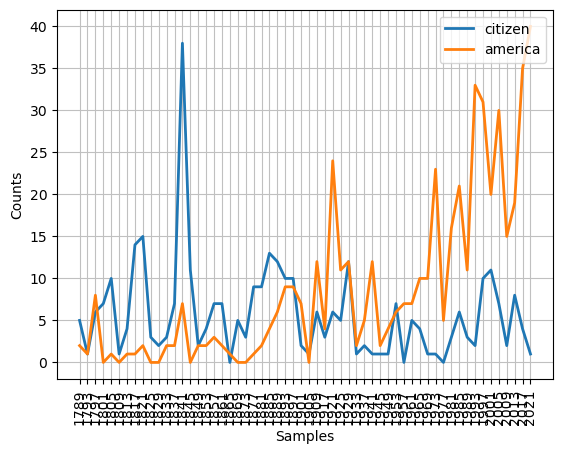

<Axes: xlabel='Samples', ylabel='Counts'>

In [31]:
cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4])
          for fileid in inaugural.fileids()
          for w in inaugural.words(fileid)
          for target in ['america', 'citizen']
          if w.lower().startswith(target)) # 1
cfd.plot() # 对二维统计表作图

图 1.1：条件频率分布图：计数就职演说语料库中所有以`america` 或`citizen`开始的词；每个演讲单独计数；这样就能观察出随时间变化用法上的演变趋势；计数没有与文档长度进行归一化处理。

<span id="1.6"></span>

## 1.6 标注文本语料库

许多文本语料库都包含语言学标注，有词性标注、命名实体、句法结构、语义角色等。NLTK 中提供了很方便的方式来访问这些语料库中的几个，还有一个包含语料库和语料样本的数据包，用于教学和科研的话可以免费下载。表[1.2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#tab-corpora)列出了其中一些语料库。有关下载信息请参阅`http://nltk.org/data`。关于如何访问NLTK 语料库的其它例子，请在`http://nltk.org/howto`查阅语料库的HOWTO。

表 1.2：

NLTK 中的一些语料库和语料库样本：关于下载和使用它们，请参阅 NLTK 网站的信息。

In [34]:
import nltk
nltk.download('cess_esp') # 有的同学可能没有下载当前内容，如果报错可以通过此方式下载所需内容

[nltk_data] Downloading package cess_esp to D:\nltk_data...
[nltk_data]   Unzipping corpora\cess_esp.zip.


True

In [4]:
nltk.corpus.cess_esp.words() # 各种语料库的简单调用方法

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [38]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [40]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [42]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [43]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

这些语料库的最后，`udhr`，是超过300 种语言的世界人权宣言。这个语料库的fileids包括有关文件所使用的字符编码，如`UTF8`或者`Latin1`。让我们用条件频率分布来研究`udhr`语料库中不同语言版本中的字长差异。图[1.2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-word-len-dist) 中所示的输出（自己运行程序可以看到一个彩色图）。注意，`True`和`False`是Python 内置的布尔值。

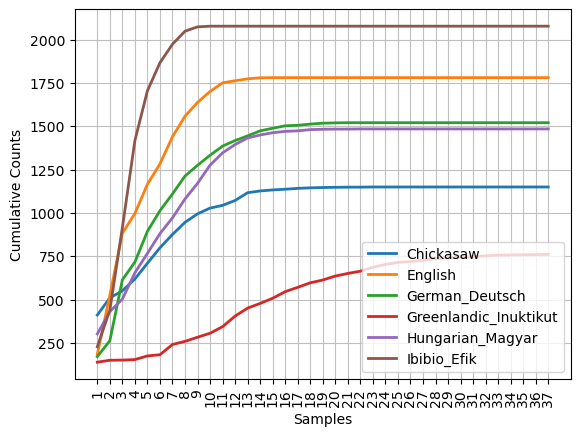

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [44]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
          (lang, len(word))
          for lang in languages
          for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True) # 人权宣言不同语言版本二维统计作图

图 1.2：累积字长分布：世界人权宣言的6个翻译版本；此图显示，5个或5个以下字母组成的词在Ibibio语言的文本中占约80％，在德语文本中占60％，在Inuktitut文本中占25%。

注意

**轮到你来：**在`udhr.fileids()`中选择一种感兴趣的语言，定义一个变量`raw_text = udhr.raw(`*Language-Latin1*`)`。使用`nltk.FreqDist(raw_text).plot()`画出此文本的字母频率分布图。

不幸的是，许多语言没有大量的语料库。通常是政府或工业对发展语言资源的支持不够，个人的努力是零碎的，难以发现或重用。有些语言没有既定的书写系统，或濒临灭绝。（见第[7](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#sec-further-reading-corpora)节有关如何寻找语言资源的建议。）

<span id="1.8"></span>

## 1.8 文本语料库的结构

到目前为止，我们已经看到了大量的语料库结构；[1.3](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-text-corpus-structure)总结了它们。最简单的一种没有任何结构，仅仅是一个文本集合。通常，文本会按照其可能对应的文体、来源、作者、语言等分类。有时，这些类别会重叠，尤其是在按主题分类的情况下，因为一个文本可能与多个主题相关。偶尔的，文本集有一个时间结构，新闻集合是最常见的例子。

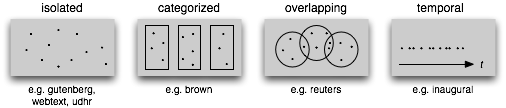

图 1.3：文本语料库的常见结构：最简单的一种语料库是一些孤立的没有什么特别的组织的文本集合；一些语料库按如文体（布朗语料库）等分类组织结构；一些分类会重叠，如主题类别（路透社语料库）；另外一些语料库可以表示随时间变化语言用法的改变（就职演说语料库）。

表 1.3：

NLTK 中定义的基本语料库函数：使用`help(nltk.corpus.reader)`可以找到更多的文档，也可以阅读`http://nltk.org/howto`上的在线语料库的HOWTO。

In [45]:
raw = gutenberg.raw("burgess-busterbrown.txt") # 古藤堡语料库字符内容
raw[1:20]

'The Adventures of B'

In [46]:
words = gutenberg.words("burgess-busterbrown.txt") # 古藤堡语料库词内容
words[1:20]

['The',
 'Adventures',
 'of',
 'Buster',
 'Bear',
 'by',
 'Thornton',
 'W',
 '.',
 'Burgess',
 '1920',
 ']',
 'I',
 'BUSTER',
 'BEAR',
 'GOES',
 'FISHING',
 'Buster',
 'Bear']

In [47]:
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:20]

[['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.'],
 ['Once',
  'more',
  'he',
  'yawned',
  ',',
  'and',
  'slowly',
  'got',
  'to',
  'his',
  'feet',
  'and',
  'shook',
  'himself',
  '.'],
 ['Then',
  'he',
  'walked',
  'over',
  'to',
  'a',
  'big',
  'pine',
  '-',
  'tree',
  ',',
  'stood',
  'up',
  'on',
  'his',
  'hind',
  'legs',
  ',',
  'reached',
  'as',
  'high',
  'up',
  'on',
  'the',
  'trunk',
  'of',
  'the',
  'tree',
  'as',
  'he',
  'could',
  ',',
  'and',
  'scratched',
  'the',
  'bark',
  'with',
  'his',
  'great',
  'claws',
  '.'],
 ['After',
  'that',
  'he',
  'yawned',
  'until',
  'it',
  'seemed',
  'as',
  'if',
  'his',

<span id="1.9"></span>

## 1.9 加载你自己的语料库

如果你有自己收集的文本文件，并且想使用前面讨论的方法访问它们，你可以很容易地在NLTK 中的`PlaintextCorpusReader`帮助下加载它们。检查你的文件在文件系统中的位置；在下面的例子中，我们假定你的文件在 `D:/nltk_data` 目录下。不管是什么位置，将变量`corpus_root` [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#corpus-root-dict) 的值设置为这个目录。`PlaintextCorpusReader`初始化函数 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#corpus-reader) 的第二个参数可以是一个如`['a.txt', 'test/b.txt']`这样的fileids列表，或者一个匹配所有fileids 的模式，如`'[abc]/.*\.txt'`（关于正则表达式的信息见[3.4](https://usyiyi.github.io/nlp-py-2e-zh/ch03.html#sec-regular-expressions-word-patterns)节）。

In [22]:
from nltk.corpus import PlaintextCorpusReader # 自己的语料库，此处用 nltk_data 代替
corpus_root = 'D:/nltk_data' # 1
wordlists = PlaintextCorpusReader(corpus_root, '.*') # 2 匹配格式
wordlists.fileids()

['chunkers/maxent_ne_chunker.xml',
 'chunkers/maxent_ne_chunker.zip',
 'corpora/abc.xml',
 'corpora/abc.zip',
 'corpora/abc/README',
 'corpora/abc/rural.txt',
 'corpora/abc/science.txt',
 'corpora/alpino.xml',
 'corpora/alpino.zip',
 'corpora/bcp47.xml',
 'corpora/bcp47.zip',
 'corpora/biocreative_ppi.xml',
 'corpora/biocreative_ppi.zip',
 'corpora/brown.xml',
 'corpora/brown.zip',
 'corpora/brown_tei.xml',
 'corpora/brown_tei.zip',
 'corpora/cess_cat.xml',
 'corpora/cess_cat.zip',
 'corpora/cess_esp.xml',
 'corpora/cess_esp.zip',
 'corpora/chat80.xml',
 'corpora/chat80.zip',
 'corpora/city_database.xml',
 'corpora/city_database.zip',
 'corpora/cmudict.xml',
 'corpora/cmudict.zip',
 'corpora/comparative_sentences.xml',
 'corpora/comparative_sentences.zip',
 'corpora/comtrans.xml',
 'corpora/comtrans.zip',
 'corpora/conll2000.xml',
 'corpora/conll2000.zip',
 'corpora/conll2002.xml',
 'corpora/conll2002.zip',
 'corpora/conll2007.xml',
 'corpora/conll2007.zip',
 'corpora/crubadan.xml',
 '

In [21]:
wordlists.words('corpora/abc/science.txt') # 对文件进行分词

['Cystic', 'fibrosis', 'affects', '30', ',', '000', ...]

举另一个例子，假设你在本地硬盘上有自己的宾州树库（第3 版）的拷贝，放在 `D:\nltk_data\corpora`。我们可以使用`BracketParseCorpusReader`访问这些语料。我们指定`corpus_root`为存放语料库中解析过的《华尔街日报》部分 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#corpus-root-treebank)的位置，并指定`file_pattern`与它的子文件夹中包含的文件匹配 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#file-pattern)（用前斜杠）。

In [ ]:
from nltk.corpus import BracketParseCorpusReader # 此处暂无相关资源，供参考
corpus_root = r"D:\nltk_data\corpora\penntreebank\parsed\mrg\wsj" # 1
file_pattern = r".*/wsj_.*\.mrg" # 2
ptb = BracketParseCorpusReader(corpus_root, file_pattern)
ptb.fileids()

In [ ]:
len(ptb.sents())

In [ ]:
ptb.sents(fileids='20/wsj_2013.mrg')[19]

## 2 条件频率分布

我们在第[3](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#sec-computing-with-language-simple-statistics)节介绍了频率分布。我们看到给定某个词汇或其他元素的列表`mylist`，`FreqDist(mylist)`会计算列表中每个元素项目出现的次数。在这里，我们将推广这一想法。

当语料文本被分为几类，如文体、主题、作者等时，我们可以计算每个类别独立的频率分布。这将允许我们研究类别之间的系统性差异。在上一节中，我们是用NLTK 的`ConditionalFreqDist`数据类型实现的。条件频率分布是频率分布的集合，每个频率分布有一个不同的“条件”。这个条件通常是文本的类别。[2.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-tally2)描绘了一个带两个条件的条件频率分布的片段，一个是新闻文本，一个是言情文本。



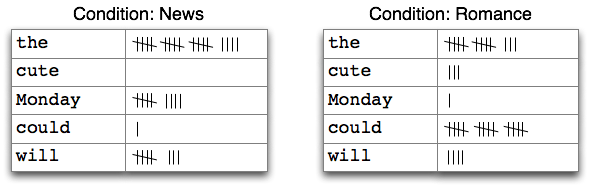

图 2.1：计数文本集合中单词出现次数（条件频率分布）

<a href="#2.1">2.1 条件和事件</a>

<a href="#2.2">2.2 按文体计数词汇</a>

<a href="#2.3">2.3 绘制分布图和分布表</a>

<a href="#2.4">2.4 使用双连词生成随机文本</a>

<span id="2.1"></span>

## 2.1 条件和事件

频率分布计算观察到的事件，如文本中出现的词汇。条件频率分布需要给每个事件关联一个条件。所以不是处理一个单词词序列 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#seq-words)，我们必须处理的是一个配对序列 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#seq-pairs)：

In [5]:
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...] # 1 条件事件匹配二维格式序列示例
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...] # 2

每个配对的形式是：`(条件, 事件)`。如果我们按文体处理整个布朗语料库，将有15 个条件（每个文体一个条件）和1,161,192 个事件（每一个词一个事件）。

<span id="2.2"></span>

## 2.2 按文体计数词汇

在[1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#sec-extracting-text-from-corpora)中，我们看到一个条件频率分布，其中条件为布朗语料库的每一节，并对每节计数词汇。`FreqDist()`以一个简单的列表作为输入，`ConditionalFreqDist()` 以一个配对列表作为输入。

In [6]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))

让我们拆开来看，只看两个文体，新闻和言情。对于每个文体 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#each-genre)，我们遍历文体中的每个词 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#each-word)，以产生文体与词的配对 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#genre-word-pairs) ：

In [7]:
genre_word = [(genre, word) # 1
              for genre in ['news', 'romance'] # 2
              for word in brown.words(categories=genre)] # 3
len(genre_word) # 对配对事件统计

170576

因此，在下面的代码中我们可以看到，列表`genre_word`的前几个配对将是 (`'news'`, *word*) [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#start-genre)的形式，而最后几个配对将是 (`'romance'`, *word*) [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#end-genre)的形式。

In [8]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [9]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

现在，我们可以使用此配对列表创建一个`ConditionalFreqDist`，并将它保存在一个变量`cfd`中。像往常一样，我们可以输入变量的名称来检查它[# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#inspect-cfd)，并确认它有两个条件[# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#conditions-cfd)：

In [10]:
cfd = nltk.ConditionalFreqDist(genre_word) # 布朗词库的条件事件二维序列
cfd # 1

<ConditionalFreqDist with 2 conditions>

In [11]:
cfd.conditions() # cfd 条件展示，可见有两个条件

['news', 'romance']

让我们访问这两个条件，它们每一个都只是一个频率分布：

In [12]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [13]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [14]:
cfd['romance'].most_common(20) # cfd 条件 romance 最常见的 20 种匹配

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

In [15]:
cfd['romance']['could'] # cfd 条件 romance 的 could 事件有 193 个

193

<span id="2.3"></span>

## 2.3 绘制分布图和分布表

除了组合两个或两个以上的频率分布和更容易初始化之外，`ConditionalFreqDist`还为制表和绘图提供了一些有用的方法。

[1.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-inaugural2)是基于下面的代码产生的一个条件频率分布绘制的。条件是词america或citizen [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#america-citizen)，被绘图的计数是在特定演讲中出现的词的次数。它利用了每个演讲的文件名——例如`1865-Lincoln.txt` ——的前4 个字符包含年代的事实[# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#first-four-chars)。这段代码为文件`1865-Lincoln.txt`中每个小写形式以america开头的词——如Americans——产生一个配对`('america', '1865')`。

In [16]:
from nltk.corpus import inaugural # 从就职典礼语料库获得条件事件序列
cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4]) 
          for fileid in inaugural.fileids()
          for w in inaugural.words(fileid)
          for target in ['america', 'citizen'] 
          if w.lower().startswith(target)) # 所有词转换为小写，收集以 target 列表内某词开始的词

图[1.2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-word-len-dist)也是基于下面的代码产生的一个条件频率分布绘制的。这次的条件是语言的名称，图中的计数来源于词长[# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#lang-len-word)。它利用了每一种语言的文件名是语言名称后面跟`'-Latin1'`（字符编码）的事实。

In [17]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
          (lang, len(word)) # 1
          for lang in languages # 获取所有 languages 列表的词
          for word in udhr.words(lang + '-Latin1')) # 获取不同语言版本的《人权宣言》获取所有词

在`plot()`和`tabulate()`方法中，我们可以使用`conditions=`来选择指定哪些条件显示。如果我们忽略它，所有条件都会显示。同样，我们可以使用`samples=`parameter 来限制要显示的样本。这使得载入大量数据到一个条件频率分布，然后通过选定条件和样品，绘图或制表的探索成为可能。这也使我们能全面控制条件和样本的显示顺序。例如：我们可以为两种语言和长度少于10 个字符的词汇绘制累计频率数据表，如下所示。我们解释一下上排最后一个单元格中数值的含义是英文文本中9 个或少于9 个字符长的词有1,638 个。

In [18]:
cfd.tabulate(conditions=['English', 'German_Deutsch'], # 指定显示条件
             samples=range(10), cumulative=True) # 限制随机 10 个样本，频率累计

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


注意

**轮到你来：** 处理布朗语料库的新闻和言情文体，找出一周中最有新闻价值并且是最浪漫的日子。定义一个变量`days`，包含星期的列表，如`['Monday', ...]`。然后使用`cfd.tabulate(samples=days)`为这些词的计数制表。接下来用`plot`替代`tabulate`尝试同样的事情。你可以在额外的参数`samples=['Monday', ...]`的帮助下控制星期输出的顺序。

你可能已经注意到：我们已经在使用的条件频率分布看上去像列表推导，但是不带方括号。通常，我们使用列表推导作为一个函数的参数，如`set([w.lower() for w in t])`，忽略掉方括号而只写`set(w.lower() for w in t)`是允许的。（更多的讲解请参见[4.2](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#sec-sequences)节“生成器表达式”的讨论。）

<span id="2.4"></span>

## 2.4 使用双连词生成随机文本

我们可以使用条件频率分布创建一个双连词表（词对）。（我们在[3](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#sec-computing-with-language-simple-statistics)中介绍过。）`bigrams()`函数接受一个单词列表，并建立一个连续的词对列表。记住，为了能看到结果而不是神秘的"生成器对象"，我们需要使用`list()`函数︰

In [19]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', \
        'and', 'the', 'earth', '.']
list(nltk.bigrams(sent)) # 建立连续的词对列表

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

在[2.2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#code-random-text)中，我们把每个词作为一个条件，对每个词我们有效的创建它的后续词的频率分布。函数`generate_model()`包含一个简单的循环来生成文本。当我们调用这个函数时，我们选择一个词（如`'living'`）作为我们的初始内容，然后进入循环，我们输入变量`word`的当前值，重新设置`word`为上下文中最可能的词符（使用`max()`）；下一次进入循环，我们使用那个词作为新的初始内容。正如你通过检查输出可以看到的，这种简单的文本生成方法往往会在循环中卡住；另一种方法是从可用的词汇中随机选择下一个词。



In [20]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt') # 《创世纪》分词
bigrams = nltk.bigrams(text) # 建立连续的词对列表
cfd = nltk.ConditionalFreqDist(bigrams) # 1 生成条件事件序列

条件频率分布是一个对许多NLP 任务都有用的数据结构。[2.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#tab-conditionalfreqdist)总结了它们常用的方法。

表 2.1：

NLTK 中的条件频率分布：定义、访问和可视化一个计数的条件频率分布的常用方法和习惯用法。



In [21]:
print('Monty Python')

Monty Python


你也可以输入`from monty import *`，它将做同样的事情。

从现在起，你可以选择使用交互式解释器或文本编辑器来创建你的程序。使用解释器测试你的想法往往比较方便，修改一行代码直到达到你期望的效果。测试好之后，你就可以将代码粘贴到文本编辑器（去除所有`>>>` 和`...`提示符），继续扩展它。给文件一个小而准确的名字，使用所有的小写字母，用下划线分割词汇，使用`.py`文件名后缀，例如`monty_python.py`。

注意

**要点：** 我们的内联代码的例子包含`>>>`和`...`提示符，好像我们正在直接与解释器交互。随着程序变得更加复杂，你应该在编辑器中输入它们，没有提示符，如前面所示的那样在编辑器中运行它们。当我们在这本书中提供更长的程序时，我们将不使用提示符以提醒你在文件中输入它而不是使用解释器。你可以看到[2.2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#code-random-text)已经这样了。请注意，这个例子还包括两行代码带有Python 提示符；它是任务的互动部分，在这里你观察一些数据，并调用一个函数。请记住，像[2.2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#code-random-text)这样的所有示例代码都可以从`http://nltk.org/`下载。

<span id="3.2"></span>

## 3.2 函数

假设你正在分析一些文本，这些文本包含同一个词的不同形式，你的一部分程序需要将给定的单数名词变成复数形式。假设需要在两个地方做这样的事，一个是处理一些文本，另一个是处理用户的输入。

比起重复相同的代码好几次，把这些事情放在一个函数中会更有效和可靠。一个函数是命名的代码块，执行一些明确的任务，就像我们在[1](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#sec-computing-with-language-texts-and-words)中所看到的那样。一个函数通常被定义来使用一些称为参数的变量接受一些输入，并且它可能会产生一些结果，也称为返回值。我们使用关键字`def`加函数名以及所有输入参数来定义一个函数，接下来是函数的主体。这里是我们在[1](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#sec-computing-with-language-texts-and-words)看到的函数（对于Python 2，请包含`import`语句，这样可以使除法像我们期望的那样运算）：

In [22]:
from __future__ import division
def lexical_diversity(text): # 词汇多样性计算函数
    return len(text) / len(set(text)) # 文本总词数/文本不重复词数

我们使用关键字`return`表示函数作为输出而产生的值。在这个例子中，函数所有的工作都在`return`语句中完成。下面是一个等价的定义，使用多行代码做同样的事。我们将把参数名称从`text`变为`my_text_data`，注意这只是一个任意的选择：

In [23]:
def lexical_diversity(my_text_data): # 这好像和上面的反了，以这个为准，返回值应该 ≤ 1
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

请注意，我们已经在函数体内部创造了一些新的变量。这些是局部变量，不能在函数体外访问。现在我们已经定义一个名为`lexical_diversity`的函数。但只定义它不会产生任何输出！函数在被“调用”之前不会做任何事情：

In [24]:
from nltk.corpus import genesis
kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)

0.06230453042623537

让我们回到前面的场景，实际定义一个简单的函数来处理英文的复数词。[3.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#code-plural)中的函数`plural()`接受单数名词，产生一个复数形式，虽然它并不总是正确的。（我们将在[4.4](https://usyiyi.github.io/nlp-py-2e-zh/ch04.html#sec-functions)中以更长的篇幅讨论这个函数。）

In [25]:
def plural(word): # 单词单数变复数函数
    if word.endswith('y'): # 词结尾为 y
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

`endswith()`函数总是与一个字符串对象一起使用（如[3.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#code-plural)中的`word`）。要调用此函数，我们使用对象的名字，一个点，然后跟函数的名称。这些函数通常被称为方法。

<span id="3.3"></span>

## 3.3 模块

随着时间的推移，你将会发现你创建了大量小而有用的文字处理函数，结果你不停的把它们从老程序复制到新程序中。哪个文件中包含的才是你要使用的函数的最新版本？如果你能把你的劳动成果收集在一个单独的地方，而且访问以前定义的函数不必复制，生活将会更加轻松。

要做到这一点，请将你的函数保存到一个文件`text_proc.py`。现在，你可以简单的通过从文件导入它来访问你的函数：

In [26]:
from text_proc import plural # 导入文本处理的复数函数，就是上面的 plural(word) 函数
plural('wish')

ModuleNotFoundError: No module named 'text_proc'

In [27]:
plural('fan')

'fen'

显然，我们的复数函数明显存在错误，因为fan的复数是fans。不必再重新输入这个函数的新版本，我们可以简单的编辑现有的。因此，在任何时候我们的复数函数只有一个版本，不会再有使用哪个版本的困扰。

在一个文件中的变量和函数定义的集合被称为一个Python 模块。相关模块的集合称为一个包。处理布朗语料库的NLTK 代码是一个模块，处理各种不同的语料库的代码的集合是一个包。NLTK 的本身是包的集合，有时被称为一个库。

小心！

如果你正在创建一个包含一些你自己的Python 代码的文件，一定*不*要将文件命名为`nltk.py`：这可能会在导入时占据“真正的”NLTK 包。当Python 导入模块时，它先查找当前目录（文件夹）。

## 4 词汇资源

词典或者词典资源是一个词和/或短语以及一些相关信息的集合，例如：词性和词意定义等相关信息。词典资源附属于文本，通常在文本的帮助下创建和丰富。例如：如果我们定义了一个文本`my_text`，然后`vocab = sorted(set(my_text))`建立`my_text`的词汇，同时`word_freq = FreqDist(my_text)`计数文本中每个词的频率。`vocab`和`word_freq`都是简单的词汇资源。同样，如我们在[1](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#sec-computing-with-language-texts-and-words)中看到的，词汇索引为我们提供了有关词语用法的信息，可能在编写词典时有用。[4.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-lexicon)中描述了词汇相关的标准术语。一个词项包括词目（也叫词条）以及其他附加信息，例如词性和词意定义。两个不同的词拼写相同被称为同音异义词。

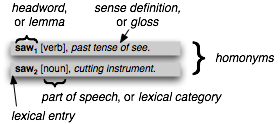

图 4.1：词典术语：两个拼写相同的词条（同音异义词）的词汇项，包括词性和注释信息。

最简单的词典是除了一个词汇列表外什么也没有。复杂的词典资源包括在词汇项内和跨词汇项的复杂的结构。在本节，我们来看看NLTK 中的一些词典资源。

<a href="#4.1">4.1 词汇列表语料库</a>

<a href="#4.2">4.2 发音的词典</a>

<a href="#4.3">4.3 比较词表</a>

<a href="#4.4">4.4 词汇工具：Shoebox和Toolbox</a>

<span id="4.1"></span>

## 4.1 词汇列表语料库

NLTK 包括一些仅仅包含词汇列表的语料库。词汇语料库是Unix 中的`/usr/share/dict/words`文件，被一些拼写检查程序使用。我们可以用它来寻找文本语料中不寻常的或拼写错误的词汇，如[4.2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#code-unusual)所示。

In [28]:
def unusual_words(text): # 不常用词
    text_vocab = set(w.lower() for w in text if w.isalpha()) # 判断全为字母的词转为小写，统计所有不重复词
    english_vocab = set(w.lower() for w in nltk.corpus.words.words()) # 语料词分词并全转为小写，并统计不重复词
    unusual = text_vocab - english_vocab
    return sorted(unusual)

unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))

['abbeyland',
 'abhorred',
 'abilities',
 'abounded',
 'abridgement',
 'abused',
 'abuses',
 'accents',
 'accepting',
 'accommodations',
 'accompanied',
 'accounted',
 'accounts',
 'accustomary',
 'aches',
 'acknowledging',
 'acknowledgment',
 'acknowledgments',
 'acquaintances',
 'acquiesced',
 'acquitted',
 'acquitting',
 'acted',
 'actions',
 'adapted',
 'adding',
 'additions',
 'addressed',
 'addresses',
 'addressing',
 'adhering',
 'adieus',
 'adjusting',
 'administering',
 'admirers',
 'admires',
 'admitting',
 'adorned',
 'advances',
 'advantages',
 'affairs',
 'affections',
 'affects',
 'affixed',
 'afflictions',
 'afforded',
 'affording',
 'ages',
 'agitated',
 'agonies',
 'ailments',
 'aimed',
 'alarms',
 'alienated',
 'alighted',
 'alleged',
 'allenham',
 'allowances',
 'allowed',
 'allowing',
 'alluded',
 'alterations',
 'altered',
 'altering',
 'amended',
 'amounted',
 'amusements',
 'ankles',
 'annamaria',
 'annexed',
 'announced',
 'announcing',
 'annuities',
 'annum',
 

In [30]:
unusual_words(nltk.corpus.nps_chat.words())

['aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'abortions',
 'abou',
 'abourted',
 'abs',
 'ack',
 'acros',
 'actualy',
 'adams',
 'adds',
 'adduser',
 'adjusts',
 'adoted',
 'adreniline',
 'ads',
 'adults',
 'afe',
 'affairs',
 'affari',
 'affects',
 'afk',
 'agaibn',
 'ages',
 'aggravated',
 'agurlwithbigguns',
 'ahah',
 'ahahah',
 'ahahh',
 'ahahha',
 'ahh',
 'ahhah',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'aiiiiiiiiiiiiiiiiiiiiiiii',
 'aiken',
 'aime',
 'akdt',
 'akon',
 'akron',
 'akst',
 'aligator',
 'allergies',
 'allo',
 'allowed',
 'aloha',
 'alohaaa',
 'alohas',
 'alot',
 'alotta',
 'alternatives',
 'alterz',
 'alwys',
 'alzheimers',
 'amazingness',
 'americans',
 'anithing',
 'ans',
 'answering',
 'answers',
 'antidepressants',
 'anygirl',
 'anymore',
 'anythin',
 'anytime',
 'anyyyyyyyyyyyyyyyyy',
 'aok',
 'apoligize',
 'appearently',
 'appears',
 'applaudes',
 'appleton',
 'appologise',
 'appologize',
 'aqwesome',
 'arggghhh',
 'argh',
 'armtnpeat',
 'arres

还有一个停用词语料库，就是那些高频词汇，如the，to和also，我们有时在进一步的处理之前想要将它们从文档中过滤。停用词通常几乎没有什么词汇内容，而它们的出现会使区分文本变困难。

In [31]:
from nltk.corpus import stopwords # 导入停用词库
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

让我们定义一个函数来计算文本中*没有*在停用词列表中的词的比例：

In [32]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english') # english 的停用词
    content = [w for w in text if w.lower() not in stopwords] # 转小写后不在停用词里的词
    return len(content) / len(text)

content_fraction(nltk.corpus.reuters.words())

0.735240435097661

因此，在停用词的帮助下，我们筛选掉文本中四分之一的词。请注意，我们在这里结合了两种不同类型的语料库，使用词典资源来过滤文本语料的内容。

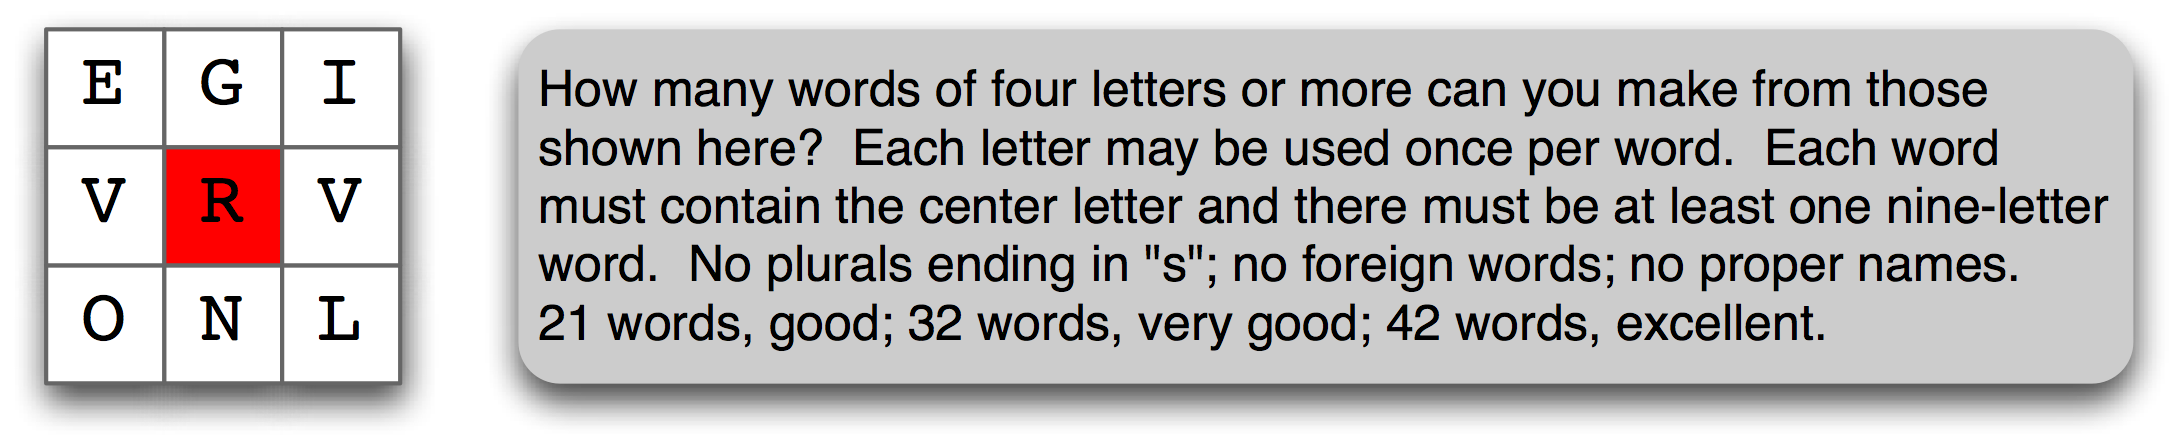

图 4.3：一个字母拼词谜题：：在由随机选择的字母组成的网格中，选择里面的字母组成词；这个谜题叫做“目标”。

一个词汇列表对解决如图 [4.3](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-target)中这样的词的谜题很有用。我们的程序遍历每一个词，对于每一个词检查是否符合条件。检查必须出现的字母 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#obligatory-letter)和长度限制 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#length-constraint)是很容易的（这里我们只查找6个或6个以上字母的词）。只使用指定的字母组合作为候选方案，尤其是一些指定的字母出现了两次（这里如字母v）这样的检查是很棘手的。`FreqDist`比较法 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#freqdist-compare)允许我们检查每个*字母*在候选词中的频率是否小于或等于相应的字母在拼词谜题中的频率。

In [35]:
puzzle_letters = nltk.FreqDist('egivrvonl') # 候选词频率
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6  # 1 说明如上 # 1
                     and obligatory in w  # 2
                     and nltk.FreqDist(w) <= puzzle_letters] # 3

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

另一个词汇列表是名字语料库，包括8000个按性别分类的名字。男性和女性的名字存储在单独的文件中。让我们找出同时出现在两个文件中的名字，即性别暧昧的名字：

In [36]:
names = nltk.corpus.names # 名字语料库
names.fileids()

['female.txt', 'male.txt']

In [37]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

正如大家都知道的，以字母a结尾的名字几乎都是女性。我们可以在[4.4](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-cfd-gender)中看到这一点以及一些其它的模式，该图是由下面的代码产生的。请记住`name[-1]`是`name`的最后一个字母。

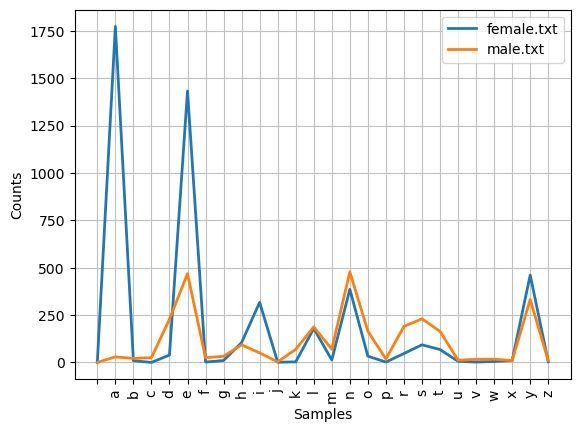

<Axes: xlabel='Samples', ylabel='Counts'>

In [38]:
cfd = nltk.ConditionalFreqDist(
          (fileid, name[-1])
          for fileid in names.fileids()
          for name in names.words(fileid))
cfd.plot()

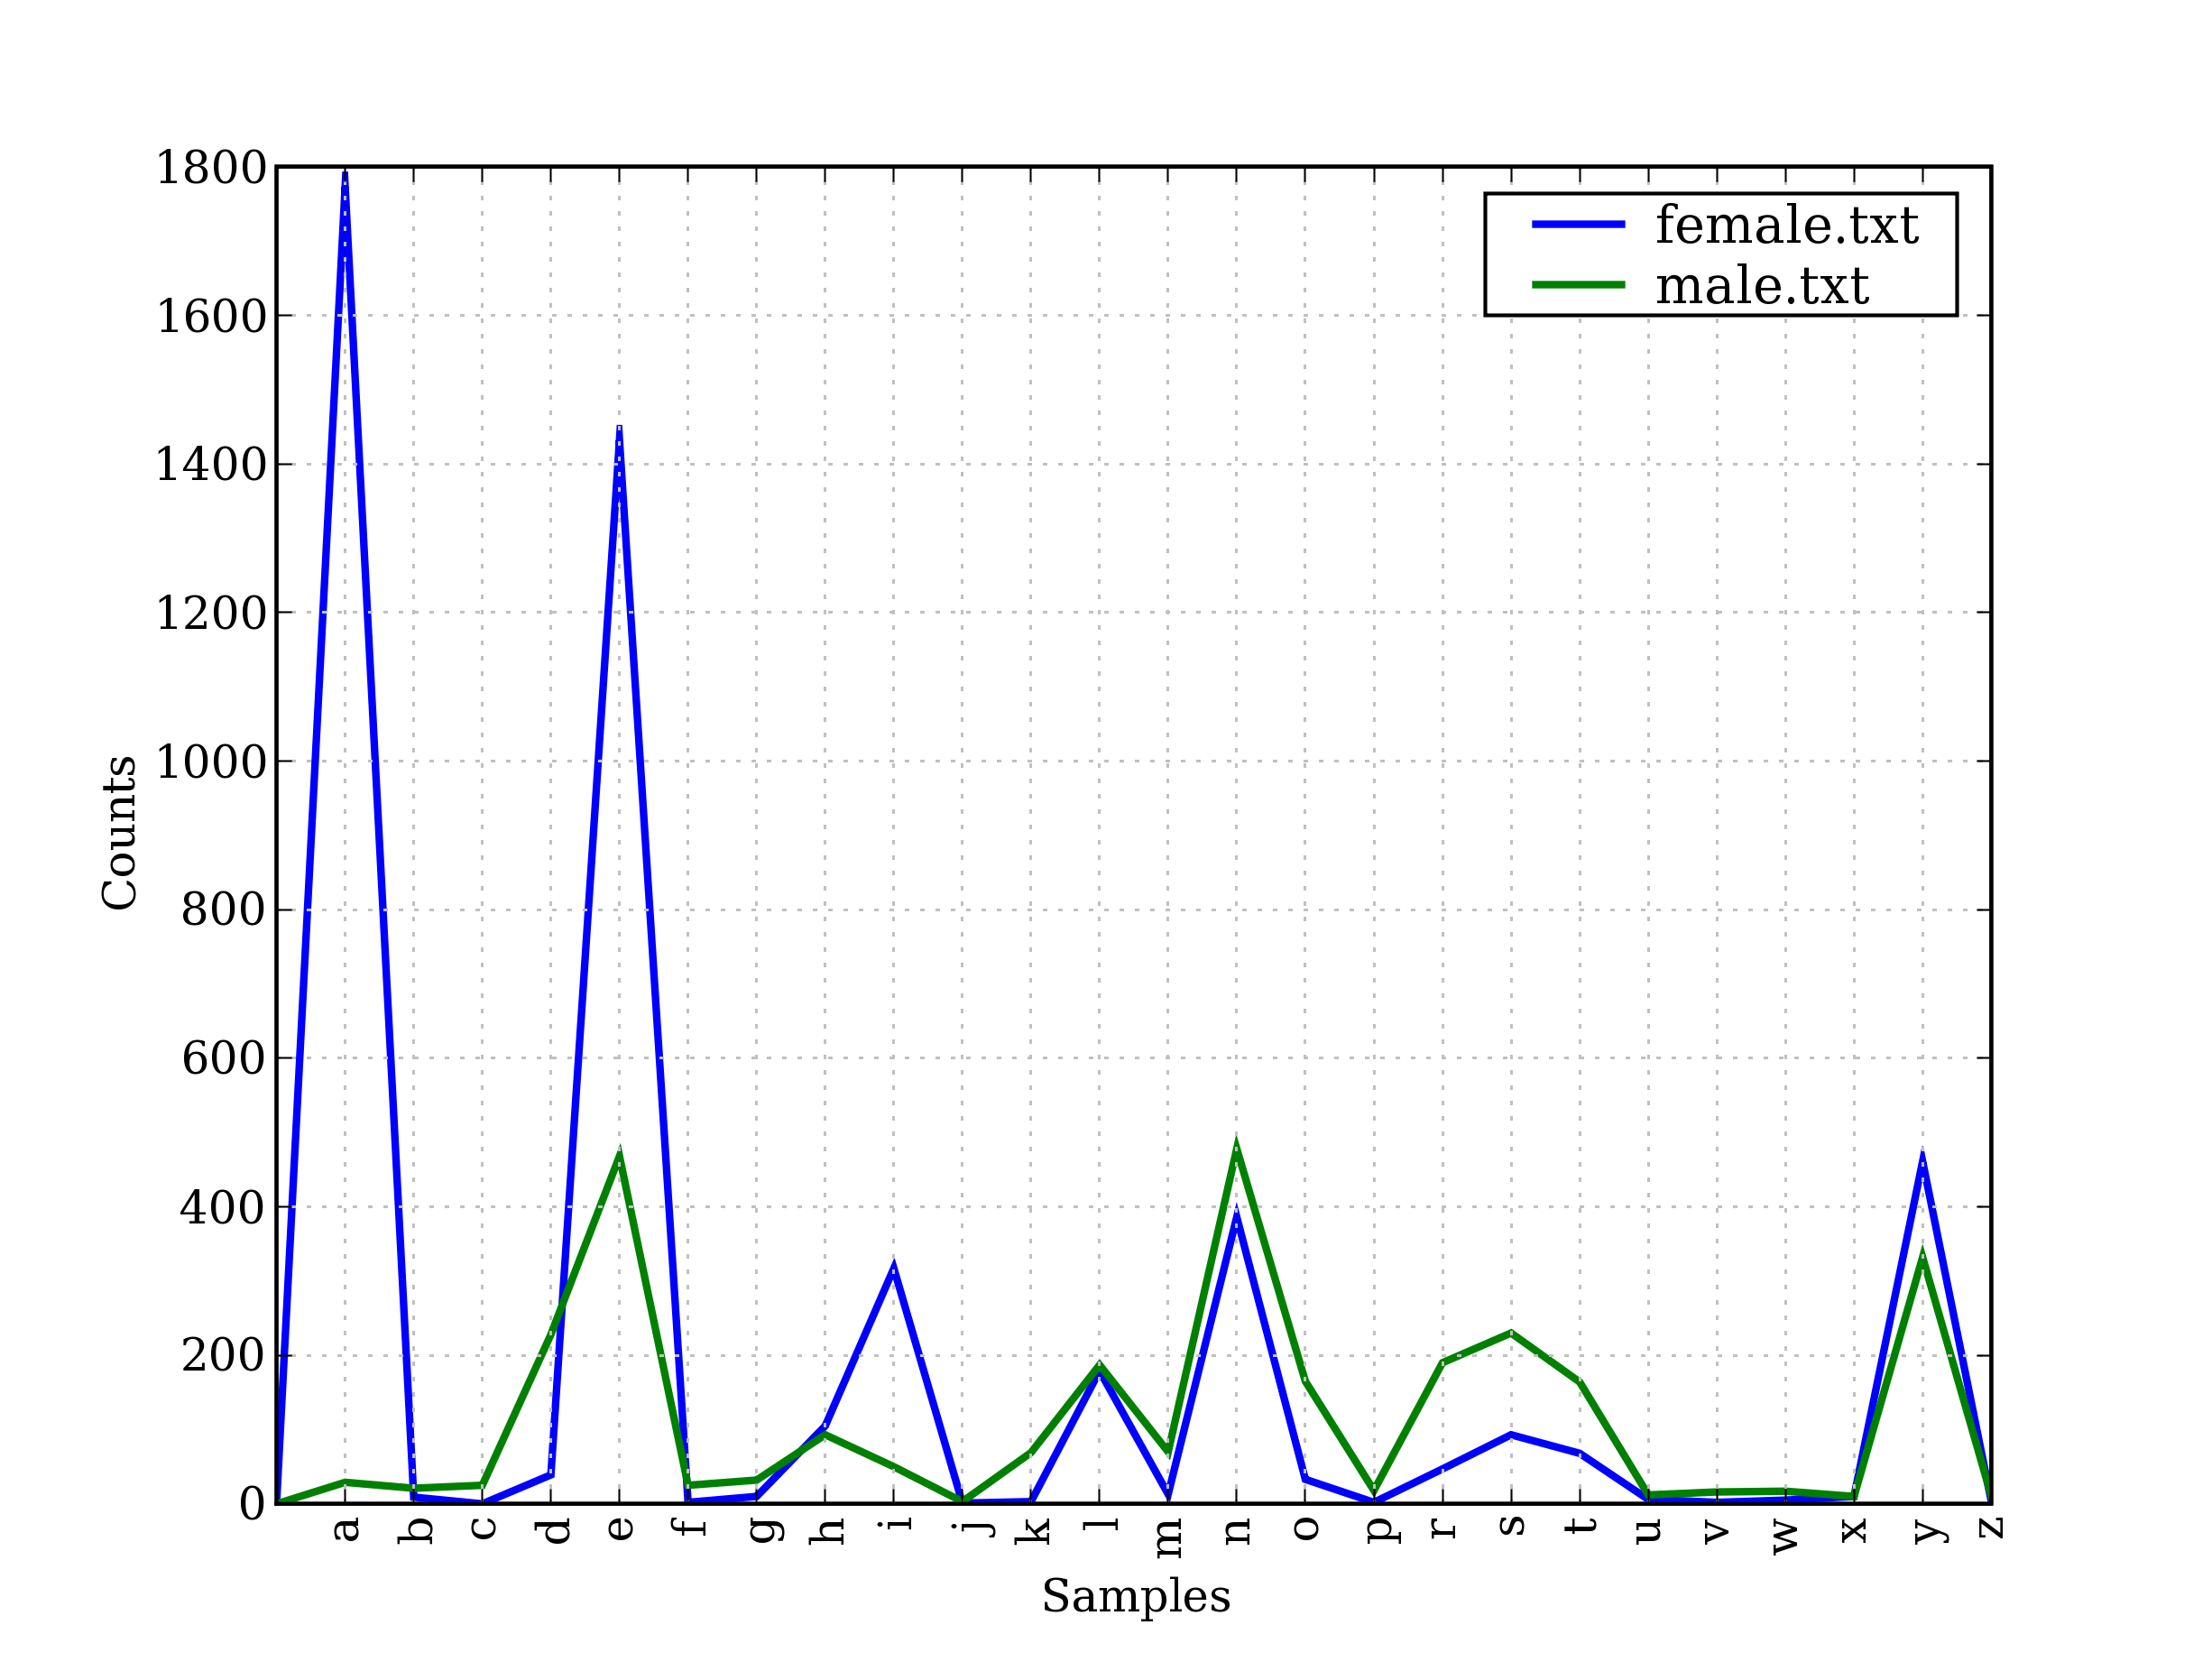

图 4.4：条件频率分布：此图显示男性和女性名字的结尾字母；大多数以a，e或i结尾的名字是女性；以h和l结尾的男性和女性同样多；以k, o, r, s和t结尾的更可能是男性。

<span id="4.2"></span>

## 4.2 发音的词典

一个稍微丰富的词典资源是一个表格（或电子表格），在每一行中含有一个词加一些性质。NLTK 中包括美国英语的CMU发音词典，它是为语音合成器使用而设计的。

In [39]:
entries = nltk.corpus.cmudict.entries() # 发音的词典
len(entries)

133737

In [40]:
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


对每一个词，这个词典资源提供语音的代码——不同的声音不同的标签——叫做phones。请看fire有两个发音（美国英语中）：单音节`F AY1 R`和双音节`F AY1 ER0`。CMU 发音词典中的符号是从*Arpabet*来的，更多的细节请参考`http://en.wikipedia.org/wiki/Arpabet`。

每个条目由两部分组成，我们可以用一个复杂的`for`语句来一个一个的处理这些。我们没有写`for entry in entries:`，而是用*两个*变量名`word, pron`替换`entry`[# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#word-pron)。现在，每次通过循环时，`word`被分配条目的第一部分，`pron`被分配条目的第二部分：

In [41]:
for word, pron in entries: # 1
    if len(pron) == 3: # 2
        ph1, ph2, ph3 = pron # 3
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

上面的程序扫描词典中那些发音包含三个音素的条目[# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#len-pron-three)。如果条件为真，就将`pron`的内容分配给三个新的变量：`ph1`, `ph2`和`ph3`。请注意实现这个功能的语句的形式并不多见[# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#tuple-assignment)。

这里是同样的`for`语句的另一个例子，这次使用内部的列表推导。这段程序找到所有发音结尾与nicks相似的词汇。你可以使用此方法来找到押韵的词。

In [42]:
syllable = ['N', 'IH0', 'K', 'S'] # 通过音节找押韵的词
[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

请注意，有几种方法来拼读一个读音：nics, niks, nix甚至ntic's加一个无声的t，如词atlantic's。让我们来看看其他一些发音与书写之间的不匹配。你可以总结一下下面的例子的功能，并解释它们是如何实现的？

In [43]:
[w for w, pron in entries if pron[-1] == 'M' and w[-1] == 'n'] # 类似连读词的处理

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

In [44]:
sorted(set(w[:2] for w, pron in entries if pron[0] == 'N' and w[0] != 'n'))

['gn', 'kn', 'mn', 'pn']

音素包含数字表示主重音(`1`)，次重音(`2`)和无重音(`0`)。作为我们最后的一个例子，我们定义一个函数来提取重音数字，然后扫描我们的词典，找到具有特定重音模式的词汇。

In [45]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()] # 提取重音数字，找到具有特定重音模式的词汇
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [46]:
[w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]

['abbreviation',
 'abbreviations',
 'abomination',
 'abortifacient',
 'abortifacients',
 'academicians',
 'accommodation',
 'accommodations',
 'accreditation',
 'accreditations',
 'accumulation',
 'accumulations',
 'acetylcholine',
 'acetylcholine',
 'adjudication',
 'administration',
 "administration's",
 'administrations',
 "administrations'",
 'aduliadae',
 'adulteration',
 'affiliation',
 'affiliations',
 'aficionados',
 'agglomeration',
 'ahasuerus',
 'ajinomoto',
 'alleviation',
 'amalgamation',
 'ambrosiano',
 'amelioration',
 'americana',
 "americana's",
 'americanas',
 'americano',
 'americanos',
 'anachronistic',
 'anencephalic',
 'annihilation',
 'antagonistic',
 'anticipation',
 'anticipations',
 'apocalyptic',
 'apologetic',
 'apotheosis',
 'appreciation',
 'appropriation',
 'appropriations',
 'approximation',
 'approximations',
 'aristocratic',
 'arunachalam',
 'assassination',
 'assassinations',
 'assimilation',
 'association',
 'association',
 'associations',
 "associat

注意

这段程序的精妙之处在于：我们的用户自定义函数`stress()`调用一个内含条件的列表推导。还有一个双层嵌套`for`循环。这里有些复杂，等你有了更多的使用列表推导的经验后，你可能会想回过来重新阅读。

我们可以使用条件频率分布来帮助我们找到词汇的最小受限集合。在这里，我们找到所有p开头的三音素词 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#p3-words)，并按照它们的第一个和最后一个音素来分组 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#group-first-last)。

In [47]:
p3 = [(pron[0]+'-'+pron[2], word) # 1 按照它们的第一个和最后一个音素来分组
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3] # 2 找到所有p开头的三音素词
cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


我们可以通过查找特定词汇来访问词典，而不必遍历整个词典。我们将使用Python 的词典数据结构，在[3](https://usyiyi.github.io/nlp-py-2e-zh/ch05.html#sec-dictionaries)节我们将系统的学习它。通过指定词典的名字后面跟一个包含在方括号里的关键字（例如词`'fire'`）来查词典 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#dict-key)。

In [3]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire'] # 1 通过指定词典的名字后面跟一个包含在方括号里的关键字查词典

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [4]:
prondict['blog'] # 2

KeyError: 'blog'

In [53]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']] # 3 为关键字分配值
prondict['blog']

[['B', 'L', 'AA1', 'G']]

如果我们试图查找一个不存在的关键字 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#dict-key-error)，就会得到一个`KeyError`。这与我们使用一个过大的整数索引一个列表时产生一个`IndexError`是类似的。词blog在发音词典中没有，所以我们对我们自己版本的词典稍作调整，为这个关键字分配一个值 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#dict-assign)（这对NLTK 语料库是没有影响的；下一次我们访问它，blog依然是空的）。

我们可以用任何词典资源来处理文本，如过滤掉具有某些词典属性的词（如名词），或者映射文本中每一个词。例如，下面的文本到发音函数在发音词典中查找文本中每个词：

In [54]:
text = ['natural', 'language', 'processing'] 
[ph for w in text for ph in prondict[w][0]] # 文本到发音函数在发音词典中查找文本中每个词

['N',
 'AE1',
 'CH',
 'ER0',
 'AH0',
 'L',
 'L',
 'AE1',
 'NG',
 'G',
 'W',
 'AH0',
 'JH',
 'P',
 'R',
 'AA1',
 'S',
 'EH0',
 'S',
 'IH0',
 'NG']

<span id="4.3"></span>

## 4.3 比较词表

表格词典的另一个例子是比较词表。NLTK 中包含了所谓的斯瓦迪士核心词列表，几种语言中约200个常用词的列表。语言标识符使用ISO639 双字母码。

In [55]:
from nltk.corpus import swadesh # 比较词表
swadesh.fileids()

['be',
 'bg',
 'bs',
 'ca',
 'cs',
 'cu',
 'de',
 'en',
 'es',
 'fr',
 'hr',
 'it',
 'la',
 'mk',
 'nl',
 'pl',
 'pt',
 'ro',
 'ru',
 'sk',
 'sl',
 'sr',
 'sw',
 'uk']

In [56]:
swadesh.words('en') # 选英语词列表

['I',
 'you (singular), thou',
 'he',
 'we',
 'you (plural)',
 'they',
 'this',
 'that',
 'here',
 'there',
 'who',
 'what',
 'where',
 'when',
 'how',
 'not',
 'all',
 'many',
 'some',
 'few',
 'other',
 'one',
 'two',
 'three',
 'four',
 'five',
 'big',
 'long',
 'wide',
 'thick',
 'heavy',
 'small',
 'short',
 'narrow',
 'thin',
 'woman',
 'man (adult male)',
 'man (human being)',
 'child',
 'wife',
 'husband',
 'mother',
 'father',
 'animal',
 'fish',
 'bird',
 'dog',
 'louse',
 'snake',
 'worm',
 'tree',
 'forest',
 'stick',
 'fruit',
 'seed',
 'leaf',
 'root',
 'bark (from tree)',
 'flower',
 'grass',
 'rope',
 'skin',
 'meat',
 'blood',
 'bone',
 'fat (noun)',
 'egg',
 'horn',
 'tail',
 'feather',
 'hair',
 'head',
 'ear',
 'eye',
 'nose',
 'mouth',
 'tooth',
 'tongue',
 'fingernail',
 'foot',
 'leg',
 'knee',
 'hand',
 'wing',
 'belly',
 'guts',
 'neck',
 'back',
 'breast',
 'heart',
 'liver',
 'drink',
 'eat',
 'bite',
 'suck',
 'spit',
 'vomit',
 'blow',
 'breathe',
 'laugh',

我们可以通过在`entries()` 方法中指定一个语言列表来访问多语言中的同源词。更进一步，我们可以把它转换成一个简单的词典（我们将在[3](https://usyiyi.github.io/nlp-py-2e-zh/ch05.html#sec-dictionaries)学到`dict()`函数）。

In [57]:
fr2en = swadesh.entries(['fr', 'en']) # 法语和英语比较
fr2en

[('je', 'I'),
 ('tu, vous', 'you (singular), thou'),
 ('il', 'he'),
 ('nous', 'we'),
 ('vous', 'you (plural)'),
 ('ils, elles', 'they'),
 ('ceci', 'this'),
 ('cela', 'that'),
 ('ici', 'here'),
 ('là', 'there'),
 ('qui', 'who'),
 ('quoi', 'what'),
 ('où', 'where'),
 ('quand', 'when'),
 ('comment', 'how'),
 ('ne...pas', 'not'),
 ('tout', 'all'),
 ('plusieurs', 'many'),
 ('quelques', 'some'),
 ('peu', 'few'),
 ('autre', 'other'),
 ('un', 'one'),
 ('deux', 'two'),
 ('trois', 'three'),
 ('quatre', 'four'),
 ('cinq', 'five'),
 ('grand', 'big'),
 ('long', 'long'),
 ('large', 'wide'),
 ('épais', 'thick'),
 ('lourd', 'heavy'),
 ('petit', 'small'),
 ('court', 'short'),
 ('étroit', 'narrow'),
 ('mince', 'thin'),
 ('femme', 'woman'),
 ('homme', 'man (adult male)'),
 ('homme', 'man (human being)'),
 ('enfant', 'child'),
 ('femme, épouse', 'wife'),
 ('mari, époux', 'husband'),
 ('mère', 'mother'),
 ('père', 'father'),
 ('animal', 'animal'),
 ('poisson', 'fish'),
 ('oiseau', 'bird'),
 ('chien', 'dog'

In [58]:
translate = dict(fr2en) # 法语转英语字典
translate['chien']

'dog'

In [59]:
translate['jeter']

'throw'

通过添加其他源语言，我们可以让我们这个简单的翻译器更为有用。让我们使用`dict()`函数把德语-英语和西班牙语-英语对相互转换成一个词典，然后用这些添加的映射*更新*我们原来的`翻译`词典：

In [60]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

'dog'

In [61]:
translate['perro'] # 翻译

'dog'

我们可以比较日尔曼语族和拉丁语族的不同：

In [62]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


<span id="4.4"></span>

## 4.4 词汇工具：Shoebox和Toolbox

可能最流行的语言学家用来管理数据的工具是*Toolbox*，以前叫做*Shoebox*，因为它用满满的档案卡片占据了语言学家的旧鞋盒。Toolbox 可以免费从`http://www.sil.org/computing/toolbox/`下载。

一个Toolbox 文件由一个大量条目的集合组成，其中每个条目由一个或多个字段组成。大多数字段都是可选的或重复的，这意味着这个词汇资源不能作为一个表格或电子表格来处理。

下面是一个罗托卡特语的词典。我们只看第一个条目，词kaa的意思是"to gag"：

In [63]:
from nltk.corpus import toolbox # 一个管理工具导入
toolbox.entries('rotokas.dic') # 属性-值对，词性、注释

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

条目包括一系列的属性-值对，如`('ps', 'V')`表示词性是`'V'`(动词)，`('ge', 'gag')`表示英文注释是'`'gag'`。最后的3 个配对包含一个罗托卡特语例句和它的巴布亚皮钦语及英语翻译。

Toolbox 文件松散的结构使我们在现阶段很难更好的利用它。XML 提供了一种强有力的方式来处理这种语料库，我们将在[11.](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#chap-data)回到这个的主题。

注意

罗托卡特语是巴布亚新几内亚的布干维尔岛上使用的一种语言。这个词典资源由Stuart Robinson 贡献给NLTK。罗托卡特语以仅有12 个音素（彼此对立的声音）而闻名。详情请参考：`http://en.wikipedia.org/wiki/Rotokas_language`

## 5 WordNet

WordNet是面向语义的英语词典，类似与传统辞典，但具有更丰富的结构。NLTK 中包括英语WordNet，共有155,287 个词和117,659 个同义词集合。我们将以寻找同义词和它们在WordNet中如何访问开始。


<a href="#5.1">5.1 意义与同义词</a>

<a href="#5.2">5.2 WordNet的层次结构</a>

<a href="#5.3">5.3 更多的词汇关系</a>

<a href="#5.4">5.4 语义相似度</a>

<span id="5.1"></span>

## 5.1 意义与同义词

考虑[(1a)](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#ex-car1)中的句子。如果我们用automobile替换掉[(1a)](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#ex-car1)中的词motorcar，变成[(1b)](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#ex-car2)，句子的意思几乎保持不变：



In [64]:
from nltk.corpus import wordnet as wn # 词网，词意和同义词相关
wn.synsets('motorcar') # 同义词集

[Synset('car.n.01')]

因此，motorcar只有一个可能的含义，它被定义为`car.n.01`，car的第一个名词意义。`car.n.01`被称为synset或“同义词集”，意义相同的词（或“词条”）的集合：

In [65]:
wn.synset('car.n.01').lemma_names() # 同义词和相关描述

['car', 'auto', 'automobile', 'machine', 'motorcar']

同义词集中的每个词可以有多种含义，例如：car也可能是火车车厢、一个货车或电梯厢。但我们只对这个同义词集中所有词来说最常用的一个意义感兴趣。同义词集也有一些一般的定义和例句：

In [66]:
wn.synset('car.n.01').definition() # 词的精确定义

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [67]:
wn.synset('car.n.01').examples() # 词的示例用法

['he needs a car to get to work']

虽然定义帮助人们了解一个同义词集的本意，同义词集中的词往往对我们的程序更有用。为了消除歧义，我们将这些词标记为`car.n.01.automobile`，`car.n.01.motorcar`等。这种同义词集和词的配对叫做词条。我们可以得到指定同义词集的所有词条 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#get-lemmas)，查找特定的词条 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#lookup-lemma)，得到一个词条对应的同义词集 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#get-synset)，也可以得到一个词条的“名字”[# 4](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#get-name)：

In [68]:
wn.synset('car.n.01').lemmas() # 1 获得同义词所有词条

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [69]:
wn.lemma('car.n.01.automobile') # 2 获得特定词条

Lemma('car.n.01.automobile')

In [70]:
wn.lemma('car.n.01.automobile').synset() # 3 得到一个词条对应的同义词集

Synset('car.n.01')

In [71]:
wn.lemma('car.n.01.automobile').name() # 4 得到一个词条的“名字”

'automobile'

与词motorcar意义明确且只有一个同义词集不同，词car是含糊的，有五个同义词集：

In [72]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [73]:
for synset in wn.synsets('car'): # 多词意情况举例
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


为方便起见，我们可以用下面的方式访问所有包含词car的词条。

In [74]:
wn.lemmas('car') # 访问所有包含词car的词条

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

注意

**轮到你来：**写下词dish的你能想到的所有意思。现在，在WordNet 的帮助下使用前面所示的相同的操作探索这个词。

<span id="5.2"></span>

## 5.2 WordNet的层次结构

WordNet 的同义词集对应于抽象的概念，它们并不总是有对应的英语词汇。这些概念在层次结构中相互联系在一起。一些概念也很一般，如*实体*、*状态*、*事件*；这些被称为唯一前缀或者根同义词集。其他的，如*油老虎*和*有仓门式后背的汽车*等就比较具体的多。[5.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-wn-hierarchy)展示了一个概念层次的一小部分。

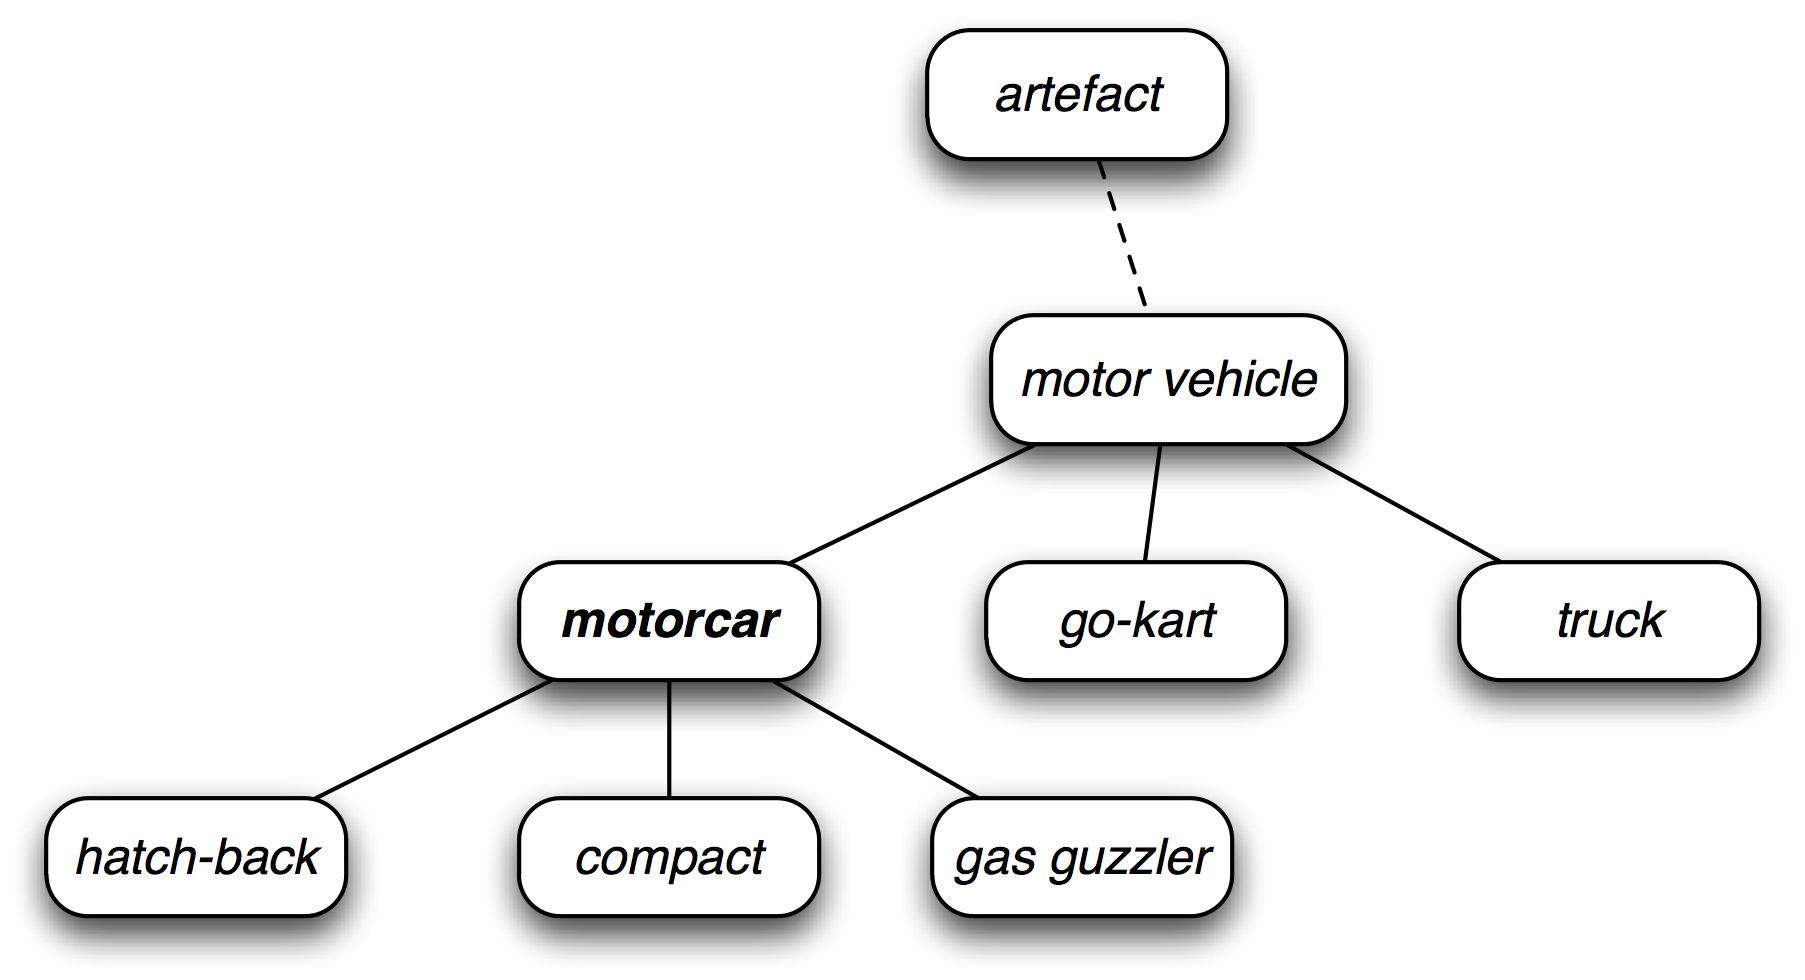

图 5.1：WordNet 概念层次片段：每个节点对应一个同义词集；边表示上位词/下位词关系，即上级概念与从属概念的关系。

WordNet 使在概念之间漫游变的容易。例如：一个如*motorcar*这样的概念，我们可以看到它的更加具体（直接）的概念——下位词。

In [75]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms() # 下位词 更加具体（直接）的概念
types_of_motorcar[0]

Synset('ambulance.n.01')

In [76]:
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

我们也可以通过访问上位词来浏览层次结构。有些词有多条路径，因为它们可以归类在一个以上的分类中。`car.n.01`与`entity.n.01`间有两条路径，因为`wheeled_vehicle.n.01`可以同时被归类为车辆和容器。

In [77]:
motorcar.hypernyms() # 上位词 浏览层次结构

[Synset('motor_vehicle.n.01')]

In [78]:
paths = motorcar.hypernym_paths() # 上位词路径
len(paths)

2

In [79]:
[synset.name() for synset in paths[0]]  # 第0个上位词路径的同义词“name”集列表

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'container.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

In [80]:
[synset.name() for synset in paths[1]] # 第1个上位词路径的同义词“name”集列表

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'conveyance.n.03',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'self-propelled_vehicle.n.01',
 'motor_vehicle.n.01',
 'car.n.01']

我们可以用如下方式得到一个最一般的上位（或根上位）同义词集：

In [81]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

注意

**轮到你来：** 尝试NLTK 中便捷的图形化WordNet浏览器：`nltk.app.wordnet()`。沿着上位词与下位词之间的链接，探索WordNet的层次结构。

<span id="5.3"></span>

## 5.3 更多的词汇关系

上位词和下位词被称为词汇关系，因为它们是同义集之间的关系。这个关系定位上下为“是一个”层次。WordNet 网络另一个重要的漫游方式是从元素到它们的部件（部分）或到它们被包含其中的东西（整体）。例如，一棵树的部分是它的树干，树冠等；这些都是`part_meronyms()`。一棵树的*实质*是包括心材和边材组成的，即`substance_meronyms()`。树木的集合形成了一个森林，即`member_holonyms()`：

In [82]:
wn.synset('tree.n.01').part_meronyms() # 上下-层次-词汇关系

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [83]:
wn.synset('tree.n.01').substance_meronyms() # 内外-环绕-词汇关系

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [84]:
wn.synset('tree.n.01').member_holonyms() # 集合-森林-词汇关系

[Synset('forest.n.01')]

来看看可以获得多么复杂的东西，考虑具有几个密切相关意思的词mint。我们可以看到`mint.n.04`是`mint.n.02`的一部分，是组成`mint.n.05`的材质。

In [85]:
for synset in wn.synsets('mint', wn.NOUN): # mint 不同用法时词的关系
    print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [86]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [87]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

动词之间也有关系。例如，走路的动作包括抬脚的动作，所以走路蕴涵着抬脚。一些动词有多个蕴涵：

In [88]:
wn.synset('walk.v.01').entailments() # 动词关系示例

[Synset('step.v.01')]

In [89]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [90]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

词条之间的一些词汇关系，如反义词:

In [91]:
wn.lemma('supply.n.02.supply').antonyms() # 词条间的关系、反义词

[Lemma('demand.n.02.demand')]

In [92]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [93]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

In [94]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

你可以使用`dir()`查看词汇关系和同义词集上定义的其它方法，例如`dir(wn.synset('harmony.n.02'))`。

<span id="5.4"></span>

## 5.4 语义相似度

我们已经看到同义词集之间构成复杂的词汇关系网络。给定一个同义词集，我们可以遍历WordNet网络来查找相关含义的同义词集。知道哪些词是语义相关的，对索引文本集合非常有用，当搜索一个一般性的用语例如车辆时，就可以匹配包含具体用语例如豪华轿车的文档。

回想一下每个同义词集都有一个或多个上位词路径连接到一个根上位词，如`entity.n.01`。连接到同一个根的两个同义词集可能有一些共同的上位词（见图[5.1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-wn-hierarchy)）。如果两个同义词集共用一个非常具体的上位词——在上位词层次结构中处于较低层的上位词——它们一定有密切的联系。

In [95]:
right = wn.synset('right_whale.n.01') # 语义相似度，上位词、根上位词直接隶属词的关系密切度
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [96]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [97]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [98]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

当然，我们知道，鲸鱼是非常具体的（须鲸更是如此），脊椎动物是更一般的，而实体完全是抽象的一般的。我们可以通过查找每个同义词集深度量化这个一般性的概念：

In [99]:
wn.synset('baleen_whale.n.01').min_depth() # 通过同义词集深度量化

14

In [100]:
wn.synset('whale.n.02').min_depth()

13

In [101]:
wn.synset('vertebrate.n.01').min_depth()

8

In [102]:
wn.synset('entity.n.01').min_depth()

0

WordNet同义词集的集合上定义的相似度能够包括上面的概念。例如，`path_similarity`是基于上位词层次结构中相互连接的概念之间的最短路径在`0`-`1`范围的打分（两者之间没有路径就返回`-1`）。同义词集与自身比较将返回`1`。考虑以下的相似度：露脊鲸与小须鲸、逆戟鲸、乌龟以及小说。数字本身的意义并不大，当我们从海洋生物的语义空间转移到非生物时它是减少的。

In [103]:
right.path_similarity(minke) # 同义词集的集合上定义的相似度

0.25

In [104]:
right.path_similarity(orca)

0.16666666666666666

In [105]:
right.path_similarity(tortoise)

0.07692307692307693

In [106]:
right.path_similarity(novel)

0.043478260869565216

注意

还有一些其它的相似性度量方法；你可以输入`help(wn)`获得更多信息。NLTK 还包括VerbNet，一个连接到WordNet的动词的层次结构的词典。It can be accessed with `nltk.corpus.verbnet`.

## 6 小结

- 文本语料库是一个大型结构化文本的集合。NLTK 包含了许多语料库，如布朗语料库`nltk.corpus.brown`。
- 有些文本语料库是分类的，例如通过文体或者主题分类；有时候语料库的分类会相互重叠。
- 条件频率分布是一个频率分布的集合，每个分布都有一个不同的条件。它们可以用于通过给定内容或者文体对词的频率计数。
- 行数较多的Python 程序应该使用文本编辑器来输入，保存为`.py`后缀的文件，并使用`import`语句来访问。
- Python 函数允许你将一段特定的代码块与一个名字联系起来，然后重用这些代码想用多少次就用多少次。
- 一些被称为“方法”的函数与一个对象联系在起来，我们使用对象名称跟一个点然后跟方法名称来调用它，就像：`x.funct(y)`或者`word.isalpha()`。
- 要想找到一些关于某个变量`v`的信息，可以在Pyhon交互式解释器中输入`help(v)`来阅读这一类对象的帮助条目。
- WordNet是一个面向语义的英语词典，由同义词的集合——或称为同义词集——组成，并且组织成一个网络。
- 默认情况下有些函数是不能使用的，必须使用Python的`import`语句来访问。

## 7 深入阅读

本章的附加材料发布在`http://nltk.org/`，包括网络上免费提供的资源的链接。语料库方法总结请参阅`http://nltk.org/howto`上的语料库HOWTO，在线API文档中也有更广泛的资料。

公开发行的语料库的重要来源是语言数据联盟（(LDC）和欧洲语言资源局（ELRA）。提供几十种语言的数以百计的已标注文本和语音语料库。非商业许可证允许这些数据用于教学和科研目的。其中一些语料库也提供商业许可（但需要较高的费用）。

用于创建标注的文本语料库的好工具叫做Brat，可从`http://brat.nlplab.org/`访问。

这些语料库和许多其他语言资源使用OLAC 元数据格式存档，可以通过 `http://www.language-archives.org/`上的OLAC 主页搜索到。Corpora List是一个讨论语料库内容的邮件列表，你可以通过搜索列表档案来找到资源或发布资源到列表中。*Ethnologue*是最完整的世界上的语言的清单，`http://www.ethnologue.com/`。7000 种语言中只有几十中有大量适合NLP 使用的数字资源。

本章触及语料库语言学领域。在这一领域的其他有用的书籍包括[(Biber, Conrad, & Reppen, 1998)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#biber1998), [(McEnery, 2006)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#mcenery2006), [(Meyer, 2002)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#meyer2002), [(Sampson & McCarthy, 2005)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#sampson2005), [(Scott & Tribble, 2006)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#scott2006)。在语言学中海量数据分析的深入阅读材料有：[(Baayen, 2008)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#baayen2008), [(Gries, 2009)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#gries2009), [(Woods, Fletcher, & Hughes, 1986)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#woods1986)。

WordNet原始描述是[(Fellbaum, 1998)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#fellbaum1998)。虽然WordNet最初是为心理语言学研究开发的，它目前在自然语言处理和信息检索领域被广泛使用。WordNets 正在开发许多其他语言的版本，在`http://www.globalwordnet.org/`中有记录。学习WordNet相似性度量可以阅读[(Budanitsky & Hirst, 2006)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#budanitsky2006ewb)。

本章触及的其它主题是语音和词汇语义学，读者可以参考[(Jurafsky & Martin, 2008)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#jurafskymartin2008)的第7和第20章。

## 8 练习

1. ☼ 创建一个变量`phrase`包含一个词的列表。实验本章描述的操作，包括加法、乘法、索引、切片和排序。

2. ☼ 使用语料库模块处理`austen-persuasion.txt`。这本书中有多少词符？多少词型？

3. ☼ 使用布朗语料库阅读器`nltk.corpus.brown.words()`或网络文本语料库阅读器`nltk.corpus.webtext.words()`来访问两个不同文体的一些样例文本。

4. ☼ 使用`state_union`语料库阅读器，访问*《国情咨文报告》*的文本。计数每个文档中出现的`men`、`women`和`people`。随时间的推移这些词的用法有什么变化？

5. ☼ 考查一些名词的整体部分关系。请记住，有3 种整体部分关系，所以你需要使用：`member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`和`substance_holonyms()`。

6. ☼ 在比较词表的讨论中，我们创建了一个对象叫做`translate`，通过它你可以使用德语和意大利语词汇查找对应的英语词汇。这种方法可能会出现什么问题？你能提出一个办法来避免这个问题吗？

7. ☼ 根据Strunk 和White 的*《Elements of Style》*，词however在句子开头使用是“in whatever way”或“to whatever extent”的意思，而没有“nevertheless”的意思。他们给出了正确用法的例子：However you advise him, he will probably do as he thinks best.(`http://www.bartleby.com/141/strunk3.html`) 使用词汇索引工具在我们一直在思考的各种文本中研究这个词的实际用法。也可以看*LanguageLog*发布在`http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html`上的“Fossilized prejudices abou‘t however’”。

8. ◑ 在名字语料库上定义一个条件频率分布，显示哪个*首*字母在男性名字中比在女性名字中更常用（参见[4.4](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#fig-cfd-gender))。

9. ◑ 挑选两个文本，研究它们之间在词汇、词汇丰富性、文体等方面的差异。你能找出几个在这两个文本中词意相当不同的词吗，例如在*《白鲸记》*与*《理智与情感》*中的monstrous？

10. ◑ 阅读BBC 新闻文章：*UK's Vicky Pollards 'left behind'* `http://news.bbc.co.uk/1/hi/education/6173441.stm`。文章给出了有关青少年语言的以下统计：“使用最多的20 个词，包括yeah, no, but 和like，占所有词的大约三分之一”。对于大量文本源来说，所有词标识符的三分之一有多少词类型？你从这个统计中得出什么结论？更多相关信息请阅读`http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html`上的*LanguageLog*。

11. ◑ 调查模式分布表，寻找其他模式。试着用你自己对不同文体的印象理解来解释它们。你能找到其他封闭的词汇归类，展现不同文体的显著差异吗？

12. ◑ CMU 发音词典包含某些词的多个发音。它包含多少种不同的词？具有多个可能的发音的词在这个词典中的比例是多少？

13. ◑ 没有下位词的名词同义词集所占的百分比是多少？你可以使用`wn.all_synsets('n')`得到所有名词同义词集。

14. ◑ 定义函数`supergloss(s)`，使用一个同义词集`s`作为它的参数，返回一个字符串，包含`s`的定义和`s`所有的上位词与下位词的定义的连接字符串。

15. ◑ 写一个程序，找出所有在布朗语料库中出现至少3 次的词。

16. ◑ 写一个程序，生成一个词汇多样性得分表（例如词符/词型的比例），如我们在[1.1](https://usyiyi.github.io/nlp-py-2e-zh/ch01.html#tab-brown-types)所看到的。包括布朗语料库文体的全集 (`nltk.corpus.brown.categories()`)。哪个文体词汇多样性最低（每个类型的标识符数最多）？这是你所期望的吗？

17. ◑ 写一个函数，找出一个文本中最常出现的50个词，停用词除外。

18. ◑ 写一个程序，输出一个文本中50 个最常见的双连词（相邻词对），忽略包含停用词的双连词。

19. ◑ 写一个程序，按文体创建一个词频表，以[1](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#sec-extracting-text-from-corpora)节给出的词频表为范例。选择你自己的词汇，并尝试找出那些在一个文体中很突出或很缺乏的词汇。讨论你的发现。

20. ◑ 写一个函数`word_freq()`，用一个词和布朗语料库中的一个部分的名字作为参数，计算这部分语料中词的频率。

21. ◑ 写一个程序，估算一个文本中的音节数，利用CMU发音词典。

22. ◑ 定义一个函数`hedge(text)`，处理一个文本和产生一个新的版本在每三个词之间插入一个词`'like'`。

23. ★ **齐夫定律**：*f(w)*是一个自由文本中的词*w*的频率。

    假设一个文本中的所有词都按照它们的频率排名，频率最高的在最前面。

    齐夫定律指出一个词类型的频率与它的排名成反比（即

    *f* × *r = k*，*k*是某个常数）。

    例如：最常见的第50个词类型出现的频率应该是最常见的第150个词型出现频率的3倍。

    1. 写一个函数来处理一个大文本,使用`pylab.plot`画出相对于词的排名的词的频率。你认可齐夫定律吗？（提示：使用对数刻度会有帮助。）所绘的线的极端情况是怎样的？
    2. 随机生成文本，如使用`random.choice("abcdefg ")`，注意要包括空格字符。你需要事先`import random`。使用字符串连接操作将字符累积成一个很长的字符串。然后为这个字符串分词，产生前面的齐夫图，比较这两个图。此时你怎么看齐夫定律？

24. ★ 修改例[2.2](https://usyiyi.github.io/nlp-py-2e-zh/ch02.html#code-random-text)的文本生成程序，进一步完成下列任务：

    1. 在一个列表`words`中存储*n*个最相似的词，使用`random.choice()`从列表中随机选取一个词。（你将需要事先`import random`。）
    2. 选择特定的文体，如布朗语料库中的一部分或者《创世纪》翻译或者古腾堡语料库中的文本或者一个网络文本。在此语料上训练一个模型，产生随机文本。你可能要实验不同的起始字。文本的可理解性如何？讨论这种方法产生随机文本的长处和短处。
    3. 现在使用两种不同文体训练你的系统，使用混合文体文本做实验。讨论你的观察结果。

25. ★ 定义一个函数`find_language()`，用一个字符串作为其参数，返回包含这个字符串作为词汇的语言的列表。使用《世界人权宣言》`udhr`的语料，将你的搜索限制在Latin-1 编码的文件中。

26. ★ 名词上位词层次的分枝因素是什么？也就是说，对于每一个具有下位词——上位词层次中的子女——的名词同义词集，它们平均有几个下位词？你可以使用`wn.all_synsets('n')`获得所有名词同义词集。

27. ★ 一个词的多义性是它所有含义的个数。利用WordNet，使用`len(wn.synsets('dog', 'n'))`我们可以判断名词*dog*有7 种含义。计算WordNet 中名词、动词、形容词和副词的平均多义性。

28. ★使用预定义的相似性度量之一给下面的每个词对的相似性打分。按相似性减少的顺序排名。你的排名与这里给出的顺序有多接近？[(Miller & Charles, 1998)](https://usyiyi.github.io/nlp-py-2e-zh/bibliography.html#millercharles1998)实验得出的顺序： car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string。

关于本文档...

针对NLTK 3.0 作出更新。本章来自于*Natural Language Processing with Python*，[Steven Bird](http://estive.net/), [Ewan Klein](http://homepages.inf.ed.ac.uk/ewan/) 和[Edward Loper](http://ed.loper.org/)，Copyright © 2014 作者所有。本章依据*Creative Commons Attribution-Noncommercial-No Derivative Works 3.0 United States License* [http://creativecommons.org/licenses/by-nc-nd/3.0/us/] 条款，与*自然语言工具包* [`http://nltk.org/`] 3.0 版一起发行。

本文档构建于星期三 2015 年 7 月 1 日 12:30:05 AEST